# Generate Training Data

In [1]:
from utils import generate_demonstrations

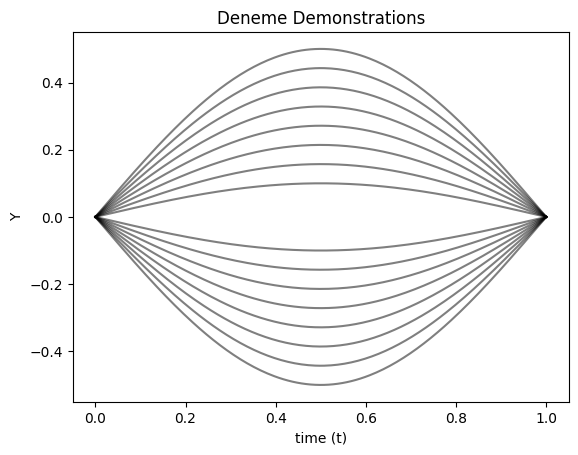

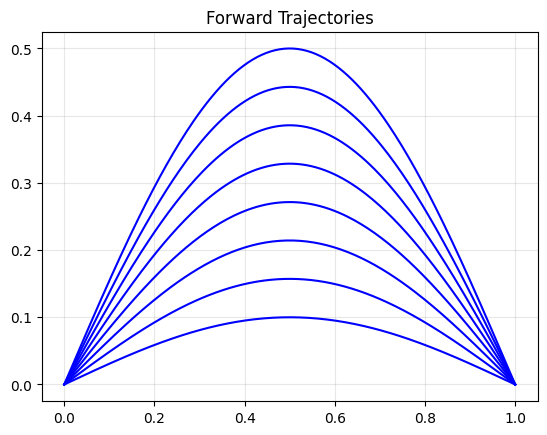

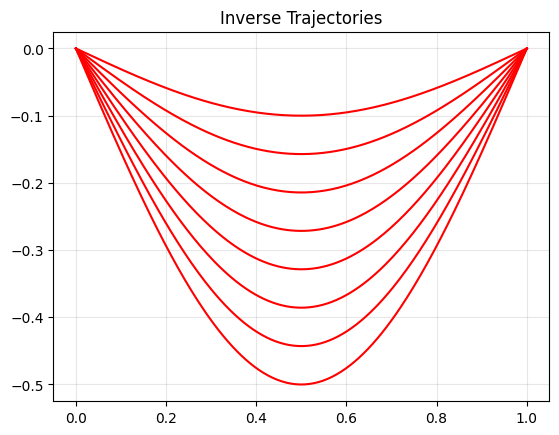

In [5]:
X1, X2, Y1, Y2 = generate_demonstrations(num_demo=8, plot_title="Deneme")

In [7]:
X1.shape

torch.Size([1, 200, 1])

In [8]:
X1

tensor([[[0.0000],
         [0.0050],
         [0.0101],
         [0.0151],
         [0.0201],
         [0.0251],
         [0.0302],
         [0.0352],
         [0.0402],
         [0.0452],
         [0.0503],
         [0.0553],
         [0.0603],
         [0.0653],
         [0.0704],
         [0.0754],
         [0.0804],
         [0.0854],
         [0.0905],
         [0.0955],
         [0.1005],
         [0.1055],
         [0.1106],
         [0.1156],
         [0.1206],
         [0.1256],
         [0.1307],
         [0.1357],
         [0.1407],
         [0.1457],
         [0.1508],
         [0.1558],
         [0.1608],
         [0.1658],
         [0.1709],
         [0.1759],
         [0.1809],
         [0.1859],
         [0.1910],
         [0.1960],
         [0.2010],
         [0.2060],
         [0.2111],
         [0.2161],
         [0.2211],
         [0.2261],
         [0.2312],
         [0.2362],
         [0.2412],
         [0.2462],
         [0.2513],
         [0.2563],
         [0.

In [9]:
Y1.shape

torch.Size([8, 200, 1])

In [11]:
import numpy as np
import torch

In [22]:
Y1_Paired = torch.tensor(np.load("data/noisy_paired/forward_noisy_paired_data.npy"), dtype=torch.float32)

In [23]:
Y1_Paired.shape

torch.Size([60, 200, 8])

In [24]:
import matplotlib.pyplot as plt

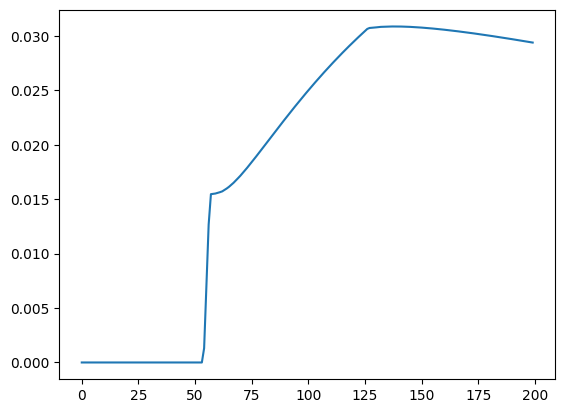

In [25]:
plt.plot(Y1_Paired[0, :, 4].numpy())